# Objective

Prepare your data for machine learning by:

* Selecting relevant features

* Encoding categorical variables

* Scaling numeric variables

* Handling imbalance

* Creating a reproducible train/test split

### Imports & Setup

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

### Load Processed Data

In [4]:
df = pd.read_csv('../data/processed/telco_churn_cleaned.csv')
df.columns = df.columns.str.lower()
print(df.shape)
df.head()

(7043, 7073)


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,...,techsupport_yes,streamingtv_no internet service,streamingtv_yes,streamingmovies_no internet service,streamingmovies_yes,contract_one year,contract_two year,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


### Drop Irrelevant or Redundant Columns

Since we already have one-hot encoded variables, remove columns that don’t help prediction.

In [5]:
drop_cols = ['customerid'] 
df.drop(columns=drop_cols, inplace=True, errors='ignore')

### Separate Features and Target

In [6]:
X = df.drop('churn', axis=1)
y = df['churn']

### Split Data into Train/Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train size:", X_train.shape, " Test size:", X_test.shape)

Train size: (5634, 7072)  Test size: (1409, 7072)


### Scale Numerical Features

In [8]:
num_cols = ['tenure', 'monthlycharges', 'totalcharges']  # update if you have more
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Handle Class Imbalance with SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts(normalize=True).round(3))
print("After SMOTE:", y_train_res.value_counts(normalize=True).round(3))

Before SMOTE: churn
0    0.735
1    0.265
Name: proportion, dtype: float64
After SMOTE: churn
0    0.5
1    0.5
Name: proportion, dtype: float64


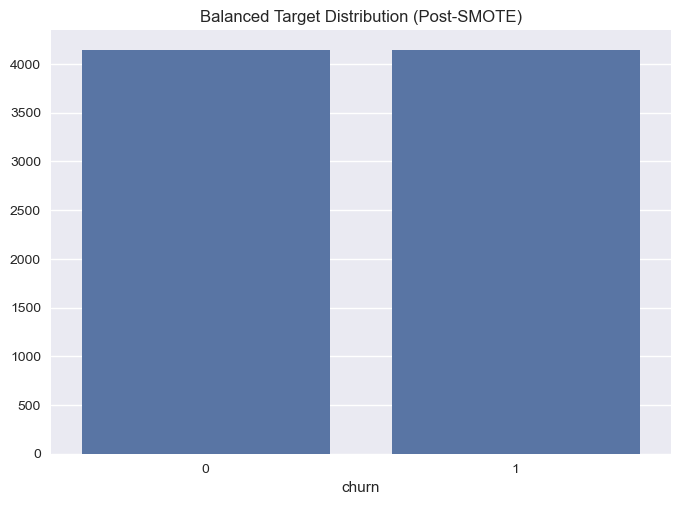

In [10]:
sns.barplot(x=y_train_res.value_counts().index, y=y_train_res.value_counts().values)
plt.title('Balanced Target Distribution (Post-SMOTE)')
plt.savefig('../reports/figures/churn_balanced_after_smote.png', dpi=200, bbox_inches='tight')
plt.show()

### Save Transformed Data

In [11]:
X_train_res.to_csv('../data/processed/X_train_res.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train_res.to_csv('../data/processed/y_train_res.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)